In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


In [344]:
X_train = pd.read_csv('preprocessed_data/X_train.csv')
X_test = pd.read_csv('preprocessed_data/X_test.csv')
X_train_sc = pd.read_csv('preprocessed_data/X_sc_train.csv')
X_test_sc = pd.read_csv('preprocessed_data/X_sc_test.csv')
y_train = pd.read_csv('preprocessed_data/y_train.csv')
y_test = pd.read_csv('preprocessed_data/y_test.csv')

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [345]:
from tqdm.notebook import tqdm, trange
import time  


***Linear Regressor***

We will begin by trying a simple linear regression and evaluating its appropriateness for our data.

In [346]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error



linreg=LinearRegression()
scores = cross_val_score(linreg, X_train, y_train, scoring='r2', cv=5)
print('Cross validation scores of 5 linear regressions:',scores)
print ('Mean cross validation train score: ',round(np.mean(scores),3))
print ('Standard deviation in cv scores: ',round(np.std(scores),3))

linreg.fit(X_train,y_train)
print('Linear regression r2 score on the training data: ',round(linreg.score(X_train,y_train),3))
print('Linear regression r2 score on the test data: ',round(linreg.score(X_test,y_test),3))
y_pred = linreg.predict(X_test)


lr_rmse= (mean_squared_error(y_test, y_pred,squared=False))
print('Root Mean Squared Error: ',round(lr_rmse,3))



Cross validation scores of 5 linear regressions: [0.31237982 0.39247241 0.34650944 0.3731394  0.33090412]
Mean cross validation train score:  0.351
Standard deviation in cv scores:  0.029
Linear regression r2 score on the training data:  0.493
Linear regression r2 score on the test data:  0.402
Root Mean Squared Error:  2.272


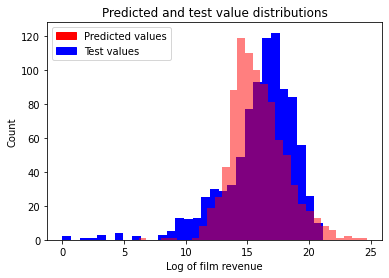

In [347]:
data = pd.DataFrame(data=y_pred,columns=['predicted values'])
data['test values']=(y_test)


#sns.scatterplot(np.log(data['actual']),np.log(data['test']))
a =plt.hist(data['test values'],bins=30,color='blue')
b =plt.hist(data['predicted values'],alpha=0.5,bins=30,color='red')


red_patch = mpatches.Patch(color='red', label='Predicted values')
blue_patch = mpatches.Patch(color='blue',label='Test values')
plt.legend(handles=[red_patch,blue_patch])
plt.ylabel('Count')
plt.xlabel('Log of film revenue')
plt.title('Predicted and test value distributions')
plt.show()


Linear regression is not a good fit for our model. This regression model does not explain the majority of the variance in our target variable (the log of revenue).

***KNeighborsRegressor***

In [348]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':range(1,50),
             'weights':['distance','uniform']}

knn = KNeighborsRegressor()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['distance', 'uniform']})

In [349]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))


Best Score:0.4193610649424687
Best Parameters: {'n_neighbors': 11, 'weights': 'distance'}


In [350]:
knn= KNeighborsRegressor(n_neighbors=11)


scores = cross_val_score(knn,X_train,y_train,scoring='r2',cv=5)
print('Cross validation scores of 5 linear regressions:',scores)
print ('Mean cross validation train score: ',round(np.mean(scores),3))
print ('Standard deviation in cv scores: ',round(np.std(scores),3))
knn.fit(X_train,y_train)
print('Linear regression r2 score on the training data: ',round(knn.score(X_train,y_train),3))
print('Linear regression r2 score on the test data: ',round(knn.score(X_test,y_test),3))
y_pred = knn.predict(X_test)
lr_rmse = (mean_squared_error(y_test, y_pred,squared=False))
print('Root Mean Squared Error: ',round(lr_rmse,3))



Cross validation scores of 5 linear regressions: [0.31965109 0.40464756 0.44903137 0.48839481 0.39125575]
Mean cross validation train score:  0.411
Standard deviation in cv scores:  0.057
Linear regression r2 score on the training data:  0.524
Linear regression r2 score on the test data:  0.432
Root Mean Squared Error:  2.214


This model is slightly improved, but still has low r2 score.

***Random Forest Regressor***

In [463]:
param_grid = {'n_estimators':[100,110,120,125,130,140],
             'max_depth':range(1,10)}

rfr = RandomForestRegressor(n_jobs=-1)
rfr_cv= GridSearchCV(rfr,param_grid,cv=5)
rfr_cv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': [100, 110, 120, 125, 130, 140]})

In [464]:
print("Best Score:" + str(rfr_cv.best_score_))
print("Best Parameters: " + str(rfr_cv.best_params_))


Best Score:0.4931099389821186
Best Parameters: {'max_depth': 9, 'n_estimators': 120}


In [466]:
rgr= RandomForestRegressor(max_depth=9,n_estimators=120)


scores = cross_val_score(rgr,X_train,y_train,scoring='r2',cv=5)
print('Cross validation scores of 5 linear regressions:',scores)
print ('Mean cross validation train score: ',round(np.mean(scores),3))
print ('Standard deviation in cv scores: ',round(np.std(scores),3))
rgr.fit(X_train,y_train)
print('Linear regression r2 score on the training data: ',round(rgr.score(X_train,y_train),3))
print('Linear regression r2 score on the test data: ',round(rgr.score(X_test,y_test),3))
y_pred = rgr.predict(X_test)
lr_rmse = (mean_squared_error(y_test, y_pred,squared=False))
print('Root Mean Squared Error: ',round(lr_rmse,3))



Cross validation scores of 5 linear regressions: [0.45994297 0.53247817 0.49240997 0.49558894 0.45758396]
Mean cross validation train score:  0.488
Standard deviation in cv scores:  0.027
Linear regression r2 score on the training data:  0.812
Linear regression r2 score on the test data:  0.489
Root Mean Squared Error:  2.101


Again, this model is somewhat of an improvement, but still cannot account for even half the variation of the target variable in the test data.

***XGBoost***

In [480]:
from xgboost.sklearn import XGBRegressor


In [459]:
xgb = XGBRegressor()
parameters = { 'n_jobs':[-1],
              'objective':['reg:squarederror'],
              'learning_rate': [0.05,0.1], 
              'max_depth': [4,5],
              'min_child_weight': [6],
              'subsample': [0.8,1],
              'colsample_bytree': [0.4],
              'n_estimators': [325]}

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.6040253122200036
{'colsample_bytree': 0.4, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 325, 'n_jobs': -1, 'objective': 'reg:squarederror', 'subsample': 1}


In [471]:
xgb= XGBRegressor(colsample_bytree= 0.4, learning_rate= 0.05, max_depth= 4, 
                      min_child_weight= 6, n_estimators= 325,
                      objective= 'reg:squarederror', subsample= 1)


scores = cross_val_score(xgb,X_train,y_train,scoring='r2',cv=5)
print('Cross validation scores of 5 linear regressions:',scores)
print ('Mean cross validation train score: ',round(np.mean(scores),3))
print ('Standard deviation in cv scores: ',round(np.std(scores),3))
xgb.fit(X_train,y_train)
print('Linear regression r2 score on the training data: ',round(xgb.score(X_train,y_train),3))
print('Linear regression r2 score on the test data: ',round(xgb.score(X_test,y_test),3))
y_pred = xgb.predict(X_test)
lr_rmse = (mean_squared_error(y_test, y_pred,squared=False))
print('Root Mean Squared Error: ',round(lr_rmse,3))



Cross validation scores of 5 linear regressions: [0.55110688 0.64991657 0.61588647 0.6085078  0.59470885]
Mean cross validation train score:  0.604
Standard deviation in cv scores:  0.032
Linear regression r2 score on the training data:  0.803
Linear regression r2 score on the test data:  0.605
Root Mean Squared Error:  1.847


This model is the best of our models. It can account for 60% of the variance in the test data revenue with a root mean squared error of 1.847. Though one should keep in mind that we have taken the log of our target variable, given the large size of the numbers in question, this is still not an exorbitant amount. 

An examination of the distributions of our predicted and test values reaffirms the fit of this model.

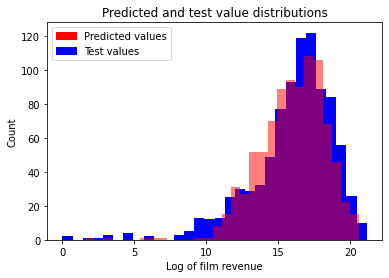

In [472]:
data = pd.DataFrame(data=y_pred,columns=['predicted values'])
data['test values']=(y_test)


#sns.scatterplot(np.log(data['actual']),np.log(data['test']))
a =plt.hist(data['test values'],bins=30,color='blue')
b =plt.hist(data['predicted values'],alpha=0.5,bins=30,color='red')


red_patch = mpatches.Patch(color='red', label='Predicted values')
blue_patch = mpatches.Patch(color='blue',label='Test values')
plt.legend(handles=[red_patch,blue_patch])
plt.ylabel('Count')
plt.xlabel('Log of film revenue')
plt.title('Predicted and test value distributions')
plt.show()


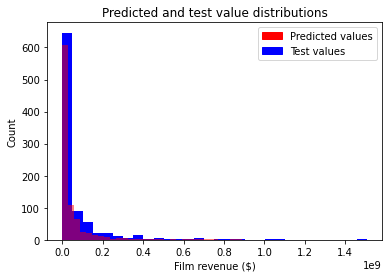

In [507]:
data = pd.DataFrame(data=y_pred,columns=['predicted values'])
data['test values']=(y_test)


#sns.scatterplot(np.log(data['actual']),np.log(data['test']))
a =plt.hist(np.exp(data['test values']),bins=30,color='blue')
b =plt.hist(np.exp(data['predicted values']),alpha=0.5,bins=30,color='red')


red_patch = mpatches.Patch(color='red', label='Predicted values')
blue_patch = mpatches.Patch(color='blue',label='Test values')
plt.legend(handles=[red_patch,blue_patch])
plt.ylabel('Count')
plt.xlabel('Film revenue ($)')
plt.title('Predicted and test value distributions')
plt.show()


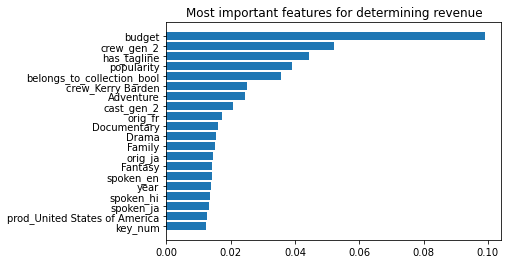

In [505]:
sorted_idx = xgb.feature_importances_.argsort()[::-1][:20]


plt.barh(X_train.columns[sorted_idx][::-1], xgb.feature_importances_[sorted_idx][::-1])
plt.title('Most important features for determining revenue')
plt.show()

The most important feature for determining revenue according to our model is by far budget. Other important features relate to the gender of the crew and cast (male heavy films earn more), the existence of various marketing features (tagline, keywords), whether a film was part of a collection/series, the genre, original language, spoken language, whether or not it was an American production, and year of release. Casting director Kerry Barden is also heavily associated with high revenue. Popularity is the fourth most important feature in determining revenue according to our model, which is something of a flaw of any model built using this data, as popularity is our most uncertain feature – it serves us as something of a proxy for film quality, but can only be determined after the release of a film, which means it is our only feature that cannot be used to predict revenue for not yet released films. 

Ultimately, this XGBoost model is our model of choice. It is by no means a perfect model, with an r2 of only 0.6, but its comparitively low root mean squared error shows that we have a decent model for predicting film revenue that could still provide some utility, as do its measures of most important features, which give us a good idea of the most important factors in film revenue and bode very well for Kerry Barden's career.